## Data exploration of JW Catalog
#### Davide Posillipo

Exploring the JW publication catalog downloaded using the Go application available here: https://github.com/MrCyjaneK/jwapi

In [46]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt

### Reading the database

In [21]:
pwd = '/Users/davideposillipo/LibJWgo/raw/'

In [22]:
con = sqlite3.connect(os.path.join(pwd, 'catalog.db'))

In [23]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[('PublicationRootKey',), ('ImageAsset',), ('PublicationAttribute',), ('Revision',), ('Publication',), ('PublicationAsset',), ('PublicationDocument',), ('AvailableBibleBook',), ('DatedText',), ('PublicationAttributeMap',), ('PublicationAssetImageMap',), ('CuratedAsset',)]


### Available Tables

#### PublicationRootKey

In [29]:
cursor.execute("PRAGMA table_info('PublicationRootKey')").fetchall()

[(0, 'Symbol', 'VARCHAR', 1, None, 0),
 (1, 'Year', 'SMALLINT', 0, None, 0),
 (2, 'Language', 'INTEGER', 1, None, 0),
 (3, 'Id', 'INTEGER', 1, None, 1)]

In [30]:
cursor.execute("SELECT * FROM PublicationRootKey LIMIT 5").fetchall()

[('jwb', None, 0, 1),
 ('pk', None, 0, 2),
 ('pksn', None, 0, 3),
 ('ijwm', None, 0, 4),
 ('ivdd', None, 0, 5)]

In [95]:
cursor.execute("SELECT Count(*) FROM PublicationRootKey;").fetchall()

[(735,)]

#### ImageAsset

#### Publication

In [16]:
publications = pd.read_sql(sql='SELECT * FROM Publication', con=con)

In [19]:
publications.columns

Index(['PublicationRootKeyId', 'MepsLanguageId', 'PublicationTypeId',
       'IssueTagNumber', 'Title', 'IssueTitle', 'ShortTitle', 'CoverTitle',
       'UndatedTitle', 'UndatedReferenceTitle', 'Year', 'Symbol', 'KeySymbol',
       'Reserved', 'Id'],
      dtype='object')

In [94]:
# total number of publications (regardless the language)
publications.shape[0]

197732

### Distribution of the publications by language and year

In [47]:
by_languages = publications.groupby('MepsLanguageId').size().sort_values(ascending=False)

In [63]:
# Number of different languages in the library
by_languages.size

707

In [49]:
by_languages.head(10)

MepsLanguageId
0      3671
3      3600
6      3564
1      3549
54     3536
7      3153
2      2508
198    2452
253    2311
4      2211
dtype: int64

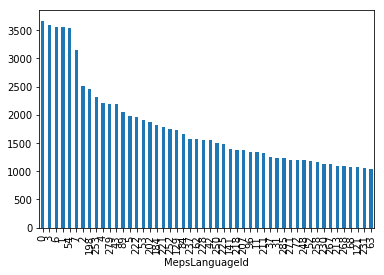

In [62]:
by_languages.head(50).plot.bar()

In [71]:
by_year = publications.groupby('Year').size().sort_index(ascending=True)

In [75]:
by_year.head()

Year
0       6
1611    1
1868    2
1876    1
1878    1
dtype: int64

In [79]:
# Publications start to be actually present in 1950
by_year.cumsum().head(20)

Year
0          6
1611       7
1868       9
1876      10
1878      11
1897      12
1901      13
1919      15
1926      16
1938      17
1950     101
1951     209
1952     317
1953     449
1954     581
1955     713
1956     846
1957     978
1958    1134
1959    1290
dtype: int64

In [73]:
by_year.tail()

Year
2018    12619
2019    12947
2020    14965
2021    10121
2022      532
dtype: int64

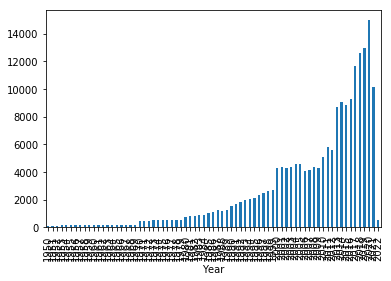

In [84]:
# Absolute number by year
by_year[by_year.index >= 1950].plot.bar()

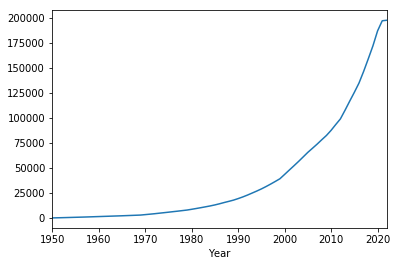

In [87]:
# Cumulative sum
by_year[by_year.index >= 1950].cumsum().plot.line()

In [89]:
# By year, but only English publication
publications_eng = publications[publications.MepsLanguageId == 0]
by_year_eng = publications_eng.groupby('Year').size().sort_index(ascending=True)

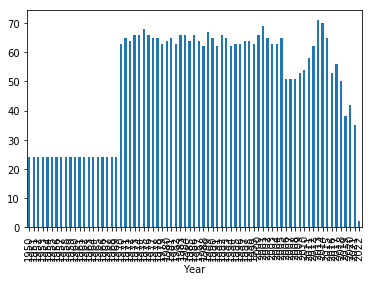

In [90]:
by_year_eng[by_year_eng.index >= 1950].plot.bar()

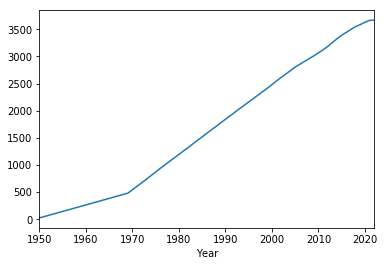

In [91]:
by_year_eng[by_year_eng.index >= 1950].cumsum().plot.line()

In [93]:
# Total number of English publications
publications_eng.shape[0]

3671